In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split

In [7]:
# load the mystery data
with open("sample_data.pkl", "rb") as f:
    X, y = pickle.load(f)

Text(0, 0.5, 'Predicted $y$')

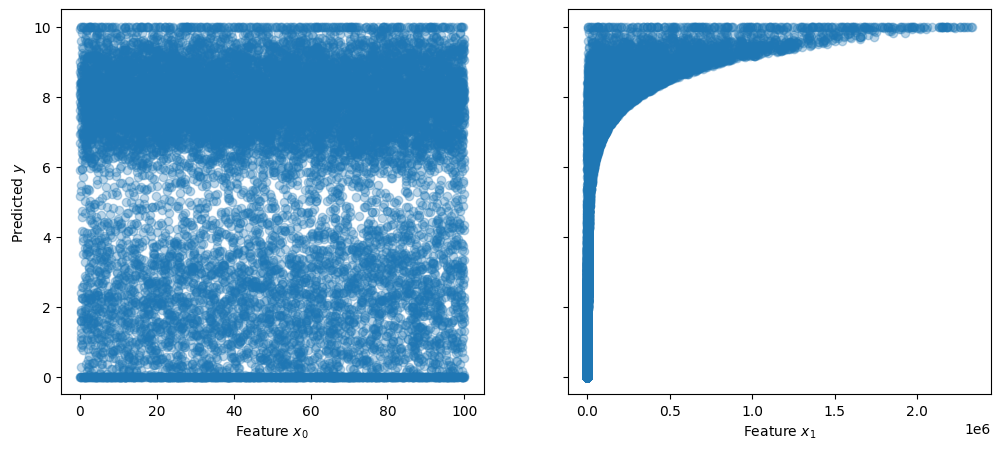

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
axes[0].scatter(X[:,0], y, alpha=0.3)
axes[1].scatter(X[:,1], y, alpha=0.3)

axes[0].set_xlabel("Feature $x_0$")
axes[1].set_xlabel("Feature $x_1$")
axes[0].set_ylabel("Predicted $y$")

In [9]:
if False:
    import torch
    import torch.nn as nn

    class Regressor(nn.Module):
        def __init__(self):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(2, 64),
                nn.ReLU(),
                nn.Linear(64, 64),
                nn.ReLU(),
                nn.Linear(64, 1)
            )

        def forward(self, x):
            return self.net(x)

    from torch.utils.data import Dataset, DataLoader

    class XYDataset(Dataset):
        def __init__(self, x1, x2, y):
            # shape: (N, 2)
            self.X = torch.tensor(
                torch.stack([x1, x2], dim=1),
                dtype=torch.float32
            )
            self.y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

        def __len__(self):
            return len(self.y)

        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]

    def train(model, dataloader, epochs=50, lr=1e-3):
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        model.train()
        for epoch in range(epochs):
            total_loss = 0.0

            for X, y in dataloader:
                optimizer.zero_grad()
                preds = model(X)
                loss = criterion(preds, y)
                loss.backward()
                optimizer.step()

                total_loss += loss.item() * len(y)

            avg_loss = total_loss / len(dataloader.dataset)
            print(f"Epoch {epoch+1:03d} | MSE: {avg_loss:.4f}")

    # Example dummy data (replace with your real data)
    N = 10000
    x1 = torch.rand(N) * 100        # feature x1
    x2 = torch.rand(N) * 2e6        # feature x2
    y  = 3.0 * torch.log(x2 + 1) + 0.1 * x1  # example target

    dataset = XYDataset(x1, x2, y)
    dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

    model = Regressor()
    train(model, dataloader, epochs=100)

    model.eval()
    with torch.no_grad():
        x_new = torch.tensor([[50.0, 1.2e6]], dtype=torch.float32)
        y_pred = model(x_new)
        print(y_pred.item())


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork().to("cpu")
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [11]:
# Define loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
history = np.zeros((epochs,))

for epoch in range(epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    history[epoch] = loss.item()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {history[epoch]:.4f}")

print("Training complete!")


Epoch 10/100, Loss: 11742776.0000
Epoch 20/100, Loss: 2911091.7500
Epoch 30/100, Loss: 643843.3125
Epoch 40/100, Loss: 35108.0547
Epoch 50/100, Loss: 31346.7539
Epoch 60/100, Loss: 78798.9141
Epoch 70/100, Loss: 27218.5391
Epoch 80/100, Loss: 70.8880
Epoch 90/100, Loss: 4003.8506
Epoch 100/100, Loss: 585.6462
Training complete!


Text(0.5, 1.0, 'Training Loss')

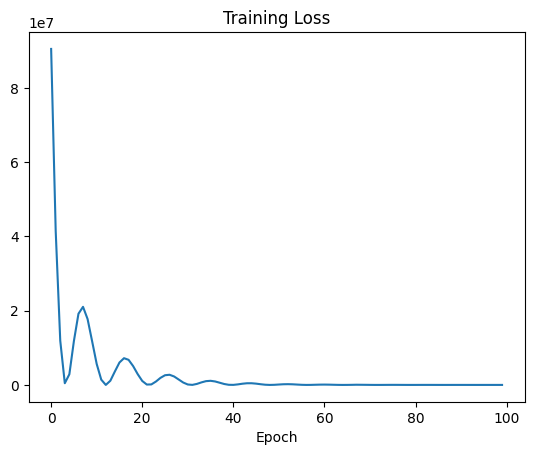

In [12]:
plt.plot(history)
plt.xlabel("Epoch")
plt.title("Training Loss")

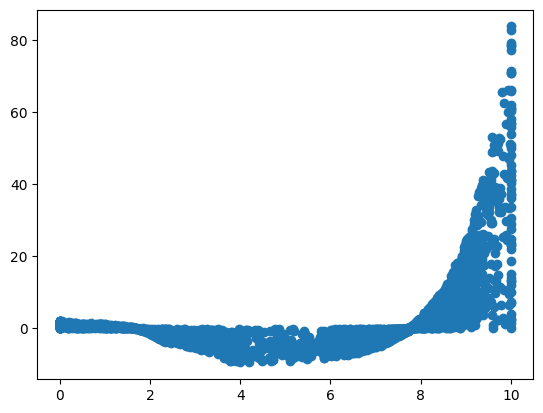

In [13]:
with torch.no_grad():
    y_pred = model(X_test_tensor)

plt.scatter(y_test, y_pred)

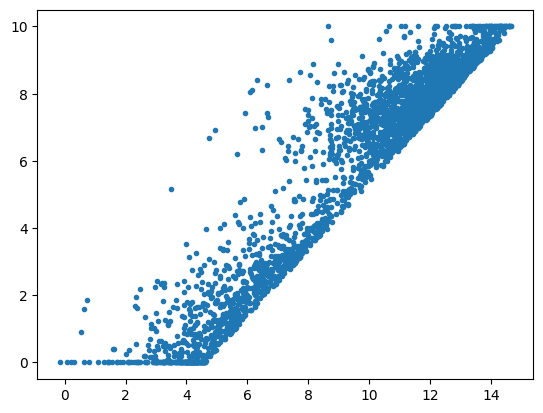

In [15]:
plt.plot(np.log(X_test[:,1]), y_test, '.')

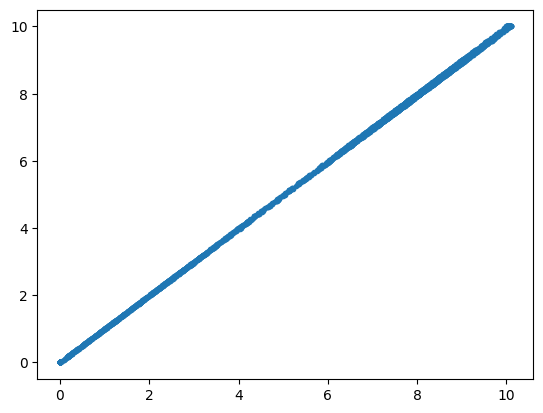

In [14]:
plt.plot(np.log(X_test[:,1]/X_test[:,0]), y_test, '.')